## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dataset Info</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:

- **salary (target feature/label):** whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- **age:** the age of an individual. (Integer greater than 0)
- **workclass:** a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **fnlwgt:** this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- **education:** the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
- **education-num:** the highest level of education achieved in numerical form. (Integer greater than 0)
- **marital-status:** marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** the biological sex of the individual. (Male, female)
- **capital-gain:** capital gains for an individual. (Integer greater than or equal to 0)
- **capital-loss:** capital loss for an individual. (Integer greater than or equal to 0)
- **hours-per-week:** the hours an individual has reported to work per week. (continuous)
- **native-country:** country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

plt.rcParams["figure.figsize"] = (10,6) # Çizeceğin görselleri bu boyutta figürere çiz
sns.set_style("whitegrid") # Figürlerin arka planı whitegrid olsun.
pd.set_option("display.float_format", lambda x: '%.2f'  %x) # Float sayıların ondalık kısmının ilk 2 basamağını göster.

pd.options.display.max_rows = 150 # DF'lerin 150 satırını göster.
pd.options.display.max_columns = 100 # DF'lerin 100 sütununu göster.

# import warnings
# warnings.filterwarnings("ignore") # Warning uyarılarını ignore et.
# warnings.warn("this will not show") # Warning uyarısı vereceği zaman bu yazsın.

In [3]:
df = pd.read_csv('adult_eda.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.00,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.00,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.00,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.00,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.00,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Try to understand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?  (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [5]:
df.shape

(32561, 15)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.00,38.58,13.64,17.00,28.00,37.00,48.00,90.00
fnlwgt,32561.00,189778.37,105549.98,12285.00,117827.00,178356.00,237051.00,1484705.00
education-num,31759.00,10.08,2.58,1.00,9.00,10.00,12.00,16.00
capital-gain,32561.00,1077.65,7385.29,0.00,0.00,0.00,0.00,99999.00
capital-loss,32561.00,87.30,402.96,0.00,0.00,0.00,0.00,4356.00
hours-per-week,32561.00,40.44,12.35,1.00,40.00,40.00,45.00,99.00


In [7]:
df.isna().sum()
# df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

## Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.  

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.00,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.00,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.00,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.00,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.00,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [10]:
df['workclass'] = df['workclass'].replace('?' , 'Unknown')
# df['workclass'].replace('?' , 'Unknown' , inplace = True)

In [11]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [12]:
object_cols = df.select_dtypes(include = 'object')
object_cols

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,NaN,White,Male,United-States,<=50K


In [13]:
for col in object_cols :
    print(col)
    print('--'*5)
    print(df[col].value_counts(dropna = False))
    print('--'*10)

workclass
----------
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
--------------------
education
----------
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
--------------------
marital-status
----------
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype

In [14]:
df.isin(['?'])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isin(['?']).sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [16]:
df = df.replace('?' , 'Unknown') #  yada  inplace=True parantez içine yaz

In [17]:
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

## Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

In [18]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.00,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.00,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.00,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.00,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.00,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
df.education.value_counts(dropna = False)

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [20]:
df['education-num'].value_counts(dropna = False)

9.00     10215
10.00     7098
13.00     5247
14.00     1687
11.00     1343
7.00      1146
12.00     1044
6.00       916
NaN        802
4.00       631
15.00      559
5.00       503
8.00       424
16.00      405
3.00       330
2.00       161
1.00        50
Name: education-num, dtype: int64

In [21]:
df.groupby('education')['education-num'].value_counts(dropna = False)

education     education-num
10th          6.00               916
              NaN                 17
11th          7.00              1146
              NaN                 29
12th          8.00               424
              NaN                  9
1st-4th       2.00               161
              NaN                  7
5th-6th       3.00               330
              NaN                  3
7th-8th       4.00               631
              NaN                 15
9th           5.00               503
              NaN                 11
Assoc-acdm    12.00             1044
              NaN                 23
Assoc-voc     11.00             1343
              NaN                 39
Bachelors     13.00             5247
              NaN                108
Doctorate     16.00              405
              NaN                  8
HS-grad       9.00             10215
              NaN                286
Masters       14.00             1687
              NaN                 36
Preschool 

In [22]:
# Drop one of them
df.drop('education-num' , axis = 1 , inplace = True)

In [23]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Impute missing value in relationship column with "Unmaried". Also replace "Not-in-family", "Other-relative" values in this column with "Unmaried"?

## Are there any similarities between relationship and marital-status ?

In [24]:
df.groupby('relationship')['marital-status'].value_counts(dropna = False)

relationship    marital-status       
Husband         Married-civ-spouse       13184
                Married-AF-spouse            9
Not-in-family   Never-married             4706
                Divorced                  2404
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unmarried       Divorced                  1601
                Never-married              881
                Separated                  451
                Widowed                    383
                Married-spouse-absent      130
Wife            Marrie

In [2]:
df['relationship'].replace( ['Not-in-family' , 'Other-relative' , np.nan]   , 'Unmarried'   , inplace = True )
# df['relationship'].replace({'Not-in-family' : 'Unmarried' , 'Other-relative' : 'Unmarried'  } , inplace = True)# yukarıdakinin farklı  şekli

NameError: name 'df' is not defined

In [26]:
df.relationship.value_counts()

Unmarried    17800
Husband      13193
Wife          1568
Name: relationship, dtype: int64

In [27]:
df.groupby('relationship' , dropna = False)['marital-status'].value_counts(dropna = False)

relationship  marital-status       
Husband       Married-civ-spouse       13184
              Married-AF-spouse            9
Unmarried     Never-married            10683
              Divorced                  4443
              Separated                 1025
              Widowed                    993
              Married-spouse-absent      418
              Married-civ-spouse         236
              Married-AF-spouse            2
Wife          Married-civ-spouse        1556
              Married-AF-spouse           12
Name: marital-status, dtype: int64

In [28]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [29]:
df.drop('marital-status' , axis = 1 , inplace = True)

In [30]:
df.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Take a look at correlation between variables and also see if there are some outliers in any of the columns.

In [31]:
df.corr() # ML için çok önemli bir metod. Değerler 0-1 arasındadır.
          # Sadece numeric olan columnların kendi aralarındaki korelasyonlara(ilişkilere) bakar.

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.00,-0.08,0.08,0.06,0.07
fnlwgt,-0.08,1.00,0.00,-0.01,-0.02
capital-gain,0.08,0.00,1.00,-0.03,0.08
capital-loss,0.06,-0.01,-0.03,1.00,0.05
hours-per-week,0.07,-0.02,0.08,0.05,1.00


In [32]:
df.salary.value_counts() # salary numeric değil  dtype  degistirmeliyiz

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [33]:
df.salary.replace({'<=50K' : 0 , '>50K' : 1} , inplace = True)

In [34]:
df.salary.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [35]:
df.salary.dtypes

dtype('int64')

In [36]:
df.corr() # artık  salary de gözüküyor

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,salary
age,1.00,-0.08,0.08,0.06,0.07,0.23
fnlwgt,-0.08,1.00,0.00,-0.01,-0.02,-0.01
capital-gain,0.08,0.00,1.00,-0.03,0.08,0.22
capital-loss,0.06,-0.01,-0.03,1.00,0.05,0.15
hours-per-week,0.07,-0.02,0.08,0.05,1.00,0.23
salary,0.23,-0.01,0.22,0.15,0.23,1.00


In [37]:
df.drop('fnlwgt' , axis = 1 , inplace = True) # Etkisiz o sebple düşürüldü

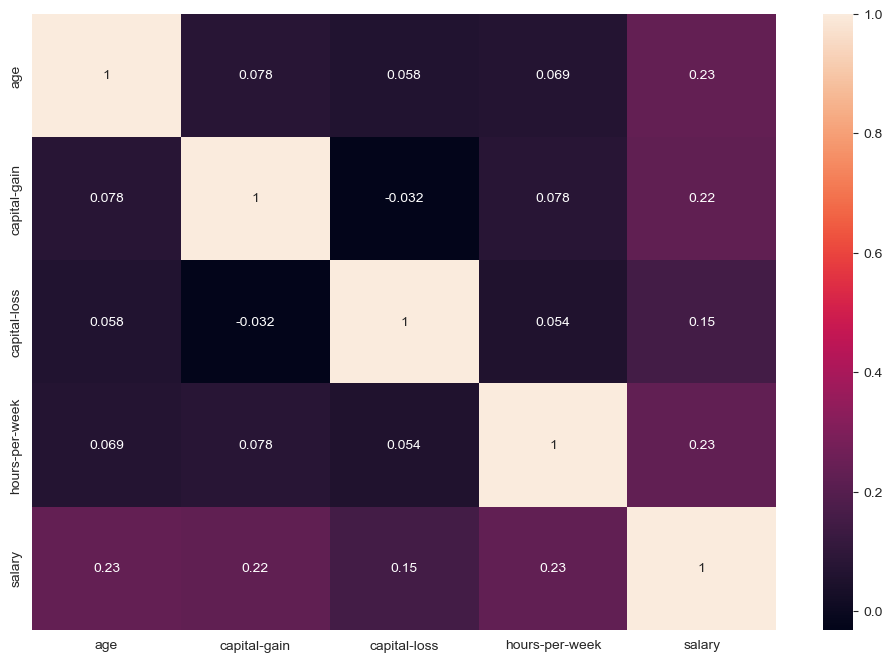

In [38]:
plt.figure(figsize = (12,8) , dpi = 100) # Çok önemli
 a
sns.heatmap(df.corr() , annot = True); # korelasyonun kardeşidir annot    üzerine yazdırır.

## Lets Dive into Columns

## age

In [39]:
df.head()

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


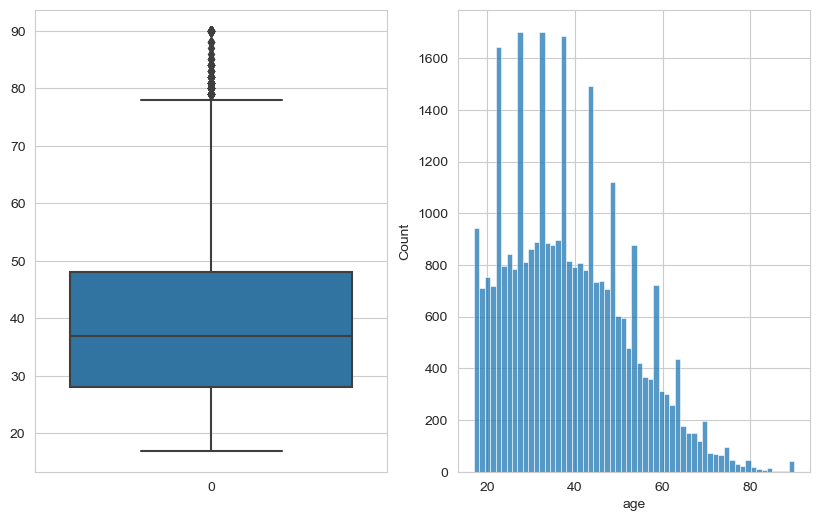

In [40]:
plt.figure(figsize = (10,6))

plt.subplot(1,2,1)
sns.boxplot(data = df.age , whis = 1.5)

plt.subplot(1,2,2)
sns.histplot(data = df.age);

In [41]:
# 1.5 whisker için IQR ile outlier tespiti.

In [42]:
q1 = df.age.quantile(0.25)
q1

28.0

In [43]:
q3 = df.age.quantile(0.75)
q3

48.0

In [44]:
IQR = q3 - q1
IQR

20.0

In [45]:
high_lim = q3 + IQR*1.5
high_lim

78.0

In [46]:
low_lim = q1 - IQR * 1.5
low_lim

-2.0

In [47]:
df[df['age'] > 78].shape

(143, 12)

In [3]:
df[df['age'] > 78]

NameError: name 'df' is not defined

## hours_per_week

In [48]:
df.head()

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [49]:
df['hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
20     1224
30     1149
55      694
25      674
48      517
38      476
15      404
70      291
10      278
32      266
24      252
65      244
36      220
42      219
44      212
16      205
12      173
43      151
37      149
8       145
52      138
80      133
56       97
28       86
99       85
46       82
18       75
72       71
75       66
6        64
5        60
4        54
47       49
84       45
22       44
54       41
33       39
3        39
39       38
41       36
14       34
2        32
27       30
26       30
17       29
49       29
90       29
34       28
58       28
7        26
53       25
21       24
13       23
23       21
1        20
62       18
9        18
57       17
66       17
19       14
64       14
51       13
85       13
68       12
98       11
11       11
63       10
78        8
29        7
77        6
31        5
59        5
96        5
67        4
76        3
81        3
91        3
61        2
86  

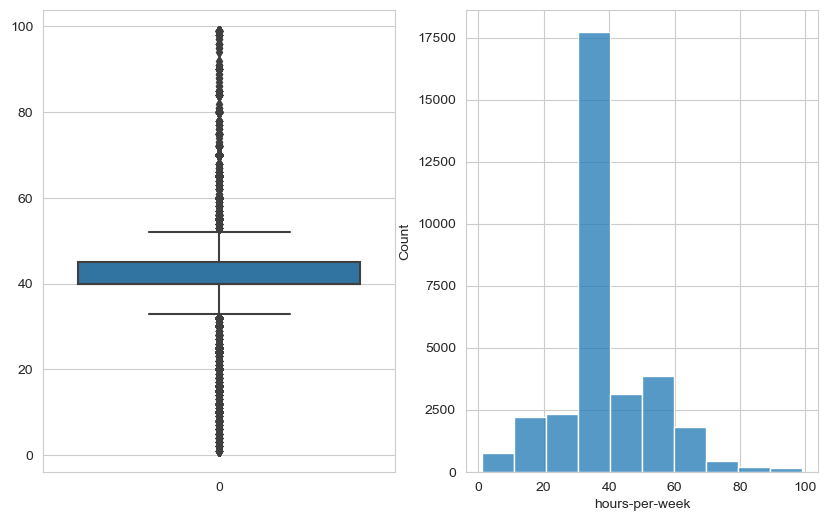

In [50]:
plt.figure(figsize = (10,6))

plt.subplot(1,2,1)
sns.boxplot(data = df['hours-per-week'] , whis = 1.5)

plt.subplot(1,2,2)
sns.histplot(data = df['hours-per-week'] , bins = 10);

In [51]:
q1 = df['hours-per-week'].quantile(0.25)
q3 = df['hours-per-week'].quantile(0.75)
IQR = q3 - q1
high_lim = q3 + 1.5*IQR
low_lim = q1 - 1.5*IQR

In [52]:
high_lim

52.5

## find outlier values which extends the upper limit in both age and hours-per-week columns

In [53]:
df[(df['age'] > 78) & (df['hours-per-week'] > 52.5)]

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
3777,80,Private,Some-college,Prof-specialty,Unmarried,White,Male,0,1816,60,United-States,0
5370,90,Local-gov,Masters,Exec-managerial,Husband,White,Male,20051,0,60,United-States,1
7481,83,Private,HS-grad,Protective-serv,Unmarried,White,Male,0,0,55,United-States,0
7720,84,Private,Masters,Prof-specialty,Unmarried,White,Male,0,0,66,United-States,0
8806,90,Private,Prof-school,Prof-specialty,Husband,White,Male,20051,0,72,United-States,1
11996,90,Private,Bachelors,Exec-managerial,Unmarried,White,Male,0,0,55,United-States,0
12830,81,Private,Masters,Prof-specialty,Unmarried,White,Male,0,0,60,Unknown,0
15356,90,Private,HS-grad,Transport-moving,Unmarried,White,Male,0,0,99,United-States,0
24395,83,Self-emp-inc,Bachelors,Exec-managerial,Husband,White,Male,0,2392,55,United-States,1


In [54]:
drop_indexes = df[(df['age'] > 78) & (df['hours-per-week'] > 52.5)].index
drop_indexes

Int64Index([3777, 5370, 7481, 7720, 8806, 11996, 12830, 15356, 24395], dtype='int64')

In [55]:
df.drop(drop_indexes , inplace = True)

In [56]:
df[(df['age'] > 78) & (df['hours-per-week'] > 52.5)] # We dropped.

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


In [57]:
df['hours-per-week'].max()

99

In [58]:
df[df['hours-per-week'] == 99].head()

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
935,37,Private,HS-grad,Craft-repair,Husband,White,Male,0,0,99,United-States,1
1172,25,Private,Masters,Farming-fishing,Unmarried,White,Male,0,0,99,United-States,1
1887,55,Self-emp-not-inc,Some-college,Farming-fishing,Husband,White,Male,0,0,99,United-States,1
3578,37,Self-emp-inc,Doctorate,Prof-specialty,Husband,Black,Male,0,0,99,United-States,1
4086,50,Unknown,10th,Unknown,Husband,White,Male,0,0,99,United-States,0


In [59]:
drop_indexes2 = df[(df['hours-per-week'] == 99) & (df['age'] > 70)].index
drop_indexes2

Int64Index([16604, 19997], dtype='int64')

In [60]:
df.drop(drop_indexes2 , inplace = True)

## Boxplot and Histplot for all numeric features

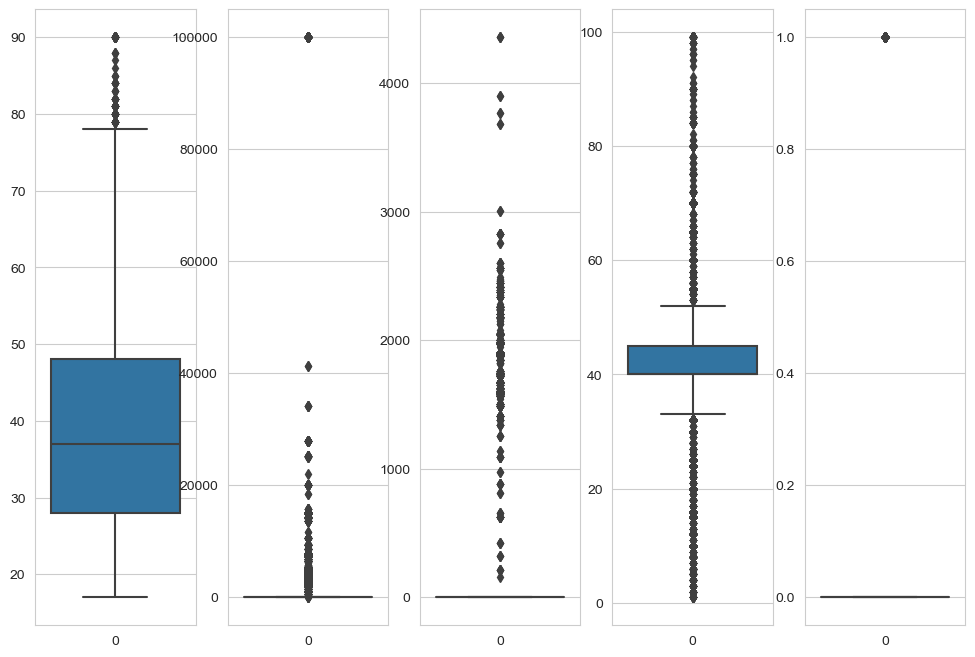

In [61]:
index = 0

plt.figure(figsize = (12,8))

for col in df.select_dtypes('number').columns :
    index += 1
    plt.subplot(1,5,index)
    sns.boxplot(data = df[col])

---
## How many of each race are represented in this dataset?
---

In [62]:
df.head()

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [63]:
df.race.value_counts()

White                 27805
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

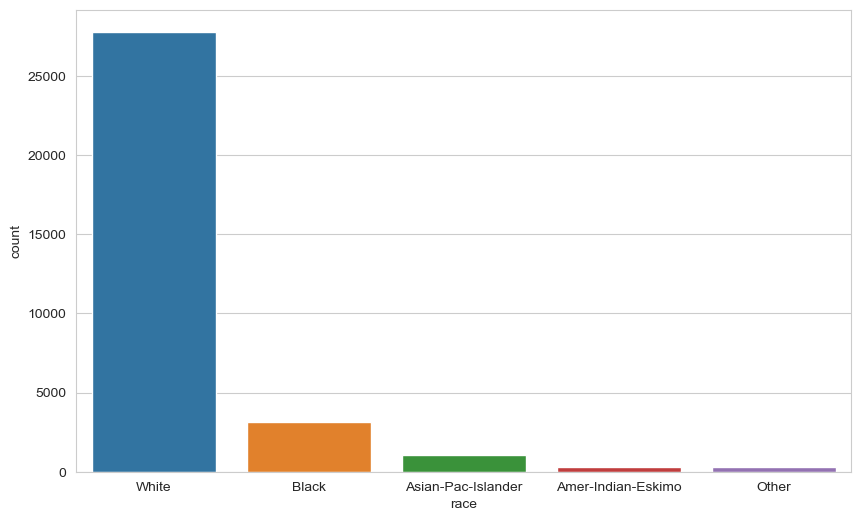

In [64]:
sns.countplot(x = df.race);

---
## What is the average age of men/women?
---

In [65]:
df.head()

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [66]:
age_men = df[df['sex'] == 'Male']['age'].mean()
age_men

39.412901744719925

In [67]:
age_women = df[df['sex'] == 'Female']['age'].mean()
age_women

36.854967502321266

---
## What is the percentage of people who have a Bachelor's degree?
---

In [68]:
df.head()

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [73]:
bachelors = df[df['education'] == 'Bachelors'].shape[0]
bachelors

5353

In [74]:
total = df.shape[0]
total

32550

In [75]:
perc_bachelors = bachelors / total
perc_bachelors

0.1644546850998464

In [77]:
print(f'Toplam datasetimizin % {round(perc_bachelors*100 , 2)} Lisans sahibidir.')

Toplam datasetimizin % 16.45 Lisans sahibidir.


---
## What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
---

In [78]:
df.head()

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [79]:
high_edu = df[df['education'].isin(['Bachelors' , 'Masters' , 'Doctorate'])]
# df[(df['education'] == 'Bachelors') | (df['education'] == 'Masters') | (df['education'] == 'Doctorate')]

In [80]:
high_edu.head()

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,Masters,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
8,31,Private,Masters,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,1


In [ ]:
high_edu.salary.value_counts()

In [ ]:
high_edu_rich = high_edu[high_edu['salary'] == 1].shape[0]
high_edu_rich

In [ ]:
total = high_edu.shape[0]
total

In [ ]:
perc_high_edu_rich = high_edu_rich / total
perc_high_edu_rich

In [ ]:
print(f'Üst düzey eğitim görmüş kişilerin %{round(perc_high_edu_rich*100 , 2)} zengin.')

## What percentage of people without advanced education make more than 50K?

In [ ]:
df.head()

In [ ]:
low_edu = df[~df.education.isin(['Bachelors' , 'Masters' , 'Doctorate'])] # ~
low_edu.head()

In [ ]:
low_edu.salary.value_counts()

In [ ]:
low_edu_rich = low_edu[low_edu.salary == 1].shape[0]
low_edu_rich

In [ ]:
total = low_edu.shape[0]
total

In [ ]:
perc_low_edu_rich = low_edu_rich / total
perc_low_edu_rich

In [ ]:
print(f'Alt düzey eğitim görmüş kişilerin %{round(perc_low_edu_rich*100 , 2)} zengin.')

## What percentage of the people who work the minimum number of hours per week have a salary of >50K?

In [81]:
df.head()

,age,workclass,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [82]:
df['hours-per-week'].min()

1

In [83]:
lazies_rich = df[(df['hours-per-week'] == df['hours-per-week'].min()) & (df['salary'] == 1)].shape[0]
lazies_rich

2

In [84]:
lazies = df[df['hours-per-week'] == df['hours-per-week'].min()].shape[0]
lazies

20

In [85]:
perc_lazy_rich = lazies_rich / lazies
perc_lazy_rich

0.1

In [86]:
print(f'Haftada 1 saat çalışan tembel kişilerin %{round(perc_lazy_rich*100 , 2)} zengin.')

Haftada 1 saat çalışan tembel kişilerin %10.0 zengin.


In [ ]:
# perc_high_edu_rich  , perc_low_edu_rich , perc_lazy_rich

if perc_high_edu_rich > perc_low_edu_rich : 
    print('Eğitim önemli. Eğitim alan zengin oluyor.')
else : 
    print('Okumaya gerek yok, okumayan daha zengin')

In [ ]:
# Done ! .